# Block 45: Workshop
## Handwritten Digit Recognition Using a Digit Classifier

## Scenario 

You are tasked with creating a digit classifier that can accurately identify `handwritten digits` from the `MNIST dataset`. Your goal is to develop a neural network model using `PyTorch` to achieve this classification task. The dataset consists of images of handwritten digits (0-9), and you need to create a model that can classify them. 


1. Import Necessary Libraries
   - Import essential libraries, including `matplotlib`, `numpy`, `torch`, and `torchvision`, to set up the environment for working with PyTorch and handling image data. 

In [17]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

2. Define data transformations
   - Create a transformation pipeline (`transform`) to preprocess the images. 

   - Transform the images into tensors and normalize pixel values to the range [-1, 1]. 

In [ ]:
transforms = transforms.Compose([
    transforms.ToTensor(),# Convert image to tensor, scaling pixel values to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

3. Load MNIST dataset
   - Load the `MNIST dataset` for both training and testing, applying the defined transformations. 

   - Store the datasets in `trainset` and `testset`. 

In [ ]:
# Load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms)

# Load the testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms)

4. Create data loaders
   - Set up data loaders to manage batching and shuffling of data during training and testing. 

   - Configure a batch size of `64` for both training and testing. 

   - Enable shuffling for the training set to randomize the order of data. 

In [ ]:
# Create data loaders for training and testing
# Data loaders provide batches of data during training and testing
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Print the number of samples in the training and test datasets
print("Training data shape:", len(trainset))
print("Test data shape:", len(testset))

Training data shape: 60000
Test data shape: 10000


5. Define a Function to Display Images
   -  Define a function called `imshow` to display images. 

   -  Unnormalize the image data (reverse the normalization process). 

   -  Ensure that images are displayed correctly, especially if they have RGB channels. 

In [ ]:
# Define a function 'imshow' for displaying images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()  # Convert the PyTorch tensor to a NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose the array to match image format
    plt.show()

6. Display Random Training Images
   -  Extract a batch of random training images and their corresponding labels. 

   -  Unnormalize and display the images in a grid format using the `imshow` function. 

   -  Print the labels of the first `4 images` in the batch. 

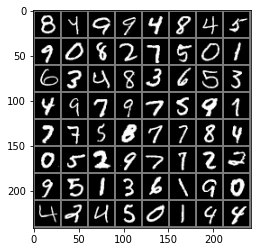

_____________________________________
8	4	9	9	4	8	4	5	9	0	8	2	7	5	0	1	6	3	4	8	3	6	5	3	4	9	7	9	7	5	9	1	7	7	5	8	7	7	8	4	0	5	2	9	7	7	2	2	9	5	1	3	6	1	9	0	4	2	4	5	0	1	9	4


In [ ]:
# Get a batch of random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show the images using the 'imshow' function
imshow(torchvision.utils.make_grid(images))

print('_____________________________________')
# Print the labels for the first four images in the batch
print('\t'.join(f'{labels[j]}' for j in range(64)))  # Corrected format code for labels

7. Define a Custom Neural Network Model
   -  Define a custom neural network model called `DigitClassifier` using PyTorch's `nn.Module`. 

   -  Create `two fully connected` (linear) layers with `ReLU activation`. 

   -  Specify the input size as `28x28` (MNIST image size) and the output size as `10` (for classifying digits 0-9). 

   -  Implement the `forward` method to define how data flows through the network. 

In [ ]:
class DigitClassifier(nn.Module):
    def __init__(self):
        
        super(DigitClassifier, self).__init__()
        
        #Dense layers
        self.fc1 = nn.Linear(28 * 28, 784)
        self.fc2 = nn.Linear(28 * 28, 784)
        self.fc3 = nn.Linear(784, 10)
        
        #Activiation Functions
        self.relu = nn.ReLU()
        
    def forward(self, x):
        
        x = x.view(x.size(0), -1) # Input and flattening
        
        x = self.fc1(x) # First fully connected layer
        x = self.relu(x) # RELU activation function
        
        x = self.fc2(x) # Second fully connected layer
        x = self.relu(x) # RELU activation function
        
        x = self.fc3(x) # output layer
        return x
    
# Create an instance of the 'FashionNet' model
model = DigitClassifier()       

8. Define Loss Function and Optimization Algorithm
   -  Define the loss function as the `Cross-Entropy Loss` using `nn.CrossEntropyLoss()`, suitable for classification tasks. 

   -  Choose the `Stochastic Gradient Descent (SGD)` optimizer as `optim.SGD()` with a learning rate and momentum to update model weights. 

In [ ]:
# Define the loss function as Cross-Entropy Loss, loss function is commonly used for classification tasks in PyTorch
criterion = nn.CrossEntropyLoss()

# Define the optimizer as Stochastic Gradient Descent (SGD) with learning rate 0.01 and momentum 0.9
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

9. Training Loop
   -  Set the number of training epochs as `10`. 

   -  Iterate through each epoch and initialize the running loss. 

   -  Loop through batches of training data and labels. 

   -  Zero the gradients to prevent accumulation using `optimizer.zero_grad()`. 

   -  Perform a `forward pass`, `compute the loss`, and `propagate gradients backward`. 

   -  Update model weights using the `optimizer.Accumulate` the running loss for each batch. 

   - Print the average loss for the current epoch. 

In [ ]:
# Training loop with 10 epochs
num_epochs = 10
for epoch in range(num_epochs):
    
    #Initializing running loss
    running_loss = 0.0
    
    
    #looping through batches of trainig data and labels
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the gradients to prevent accumulation

        outputs = model(inputs)  # Forward pass: compute predictions
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backpropagation: compute gradients
        optimizer.step()  # Update model weights using the optimizer

        running_loss += loss.item()  # Accumulate the loss for this batch

    # Print the average loss for this epoch
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

# Print a message indicating the completion of training
print("Finished Training")

Epoch 1, Loss: 0.36930038476946636
Epoch 2, Loss: 0.14564967294459913
Epoch 3, Loss: 0.10054137200605609
Epoch 4, Loss: 0.07781122252990458
Epoch 5, Loss: 0.06301422491232787
Epoch 6, Loss: 0.05225970623180715
Epoch 7, Loss: 0.04407134553358487
Epoch 8, Loss: 0.03783378497267247
Epoch 9, Loss: 0.030807510493442353
Epoch 10, Loss: 0.0271559156089483
Finished Training


10. Evaluate the Model
 
   - Initialize variables for counting correct predictions and total examples. 

   - Disable gradient tracking to save memory and computation during evaluation using `torch.no_grad()`.Iterate through the test data loader. 

   - For each batch, calculate predictions using the trained model and determine the predicted class. Keep track of the correct predictions and the total count. 

   - Calculate and print the accuracy on the test set. 

In [ ]:
# Initialize variables to keep track of correct predictions and total test samples
correct = 0
total = 0

# Use the 'torch.no_grad()' context manager to disable gradient computation during evaluation
with torch.no_grad():
    # Iterate through the test data loader
    for data in testloader:
        # Separate the data into images and labels
        images, labels = data
        
        # Forward pass to get model predictions
        outputs = model(images)
        
        # Get the predicted class indices by finding the maximum values along dimension 1 (across classes)
        _, predicted = torch.max(outputs.data, 1)
        
        # Increase the 'total' count by the number of labels in the current batch
        total += labels.size(0)
        
        # Check which predictions match the true labels and accumulate correct predictions
        correct += (predicted == labels).sum().item()

# Calculate the accuracy as the ratio of correct predictions to total samples and multiply by 100
accuracy = (correct / total) * 100

# Print the accuracy on the test set with formatting
print(f"Accuracy on the test set: {accuracy:.2f}%")


Accuracy on the test set: 97.78%
